In [ ]:
import numpy as np
import cv2
import sys

In [ ]:
window_title = 'frame'
cv2.namedWindow(window_title, cv2.WINDOW_NORMAL)

In [ ]:
#file = sys.argv[1]
file = "input.vid"

cap = cv2.VideoCapture(file)

frame_prev = None

diffs = []

while(cap.isOpened()):
    ret, frame = cap.read()
    if frame is None:
        break
    frame = frame.astype(np.float32)
    # frame2 = frame.astype(np.uint8)
    # cv2.imshow(window_title, frame2)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if frame_prev is not None:
        diff = (frame - frame_prev) / 256
        diff_rms = np.sqrt(np.mean(diff ** 2))
        diffi = ((diff/2+0.5) * 256).astype(np.uint8)
        # print(diff_rms)
        # cv2.imshow(window_title, diffi)
        diffs.append(diff_rms)
        # print(diff.nbytes)
        if diff_rms > 0:
            cv2.imshow(window_title, frame_prev.astype(np.uint8))
    frame_prev = frame

cap.release()
cv2.destroyAllWindows()

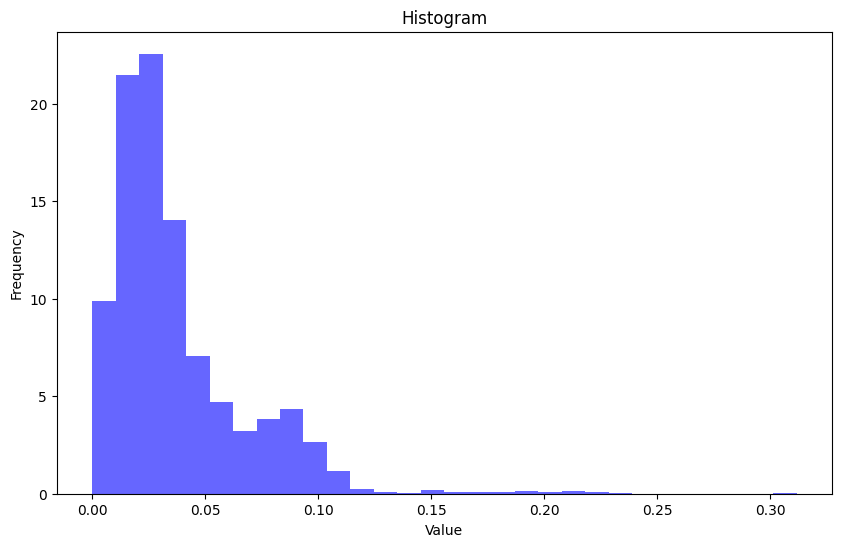

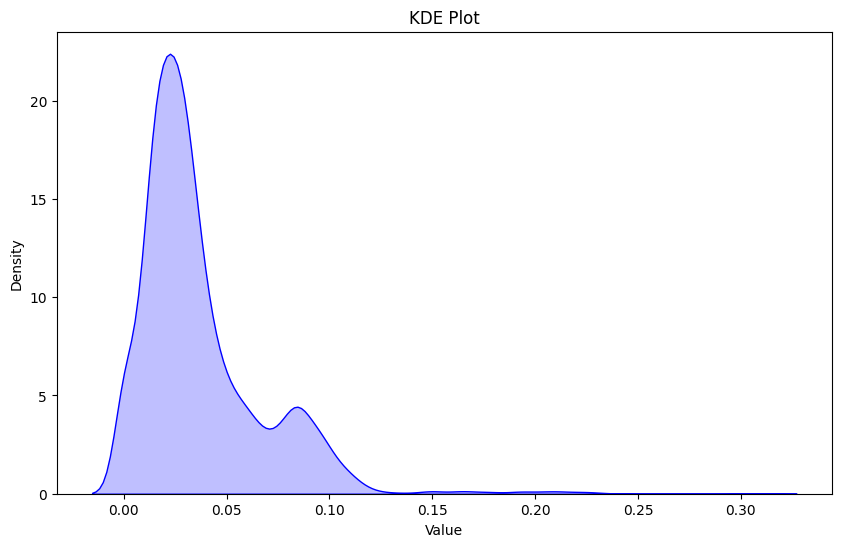

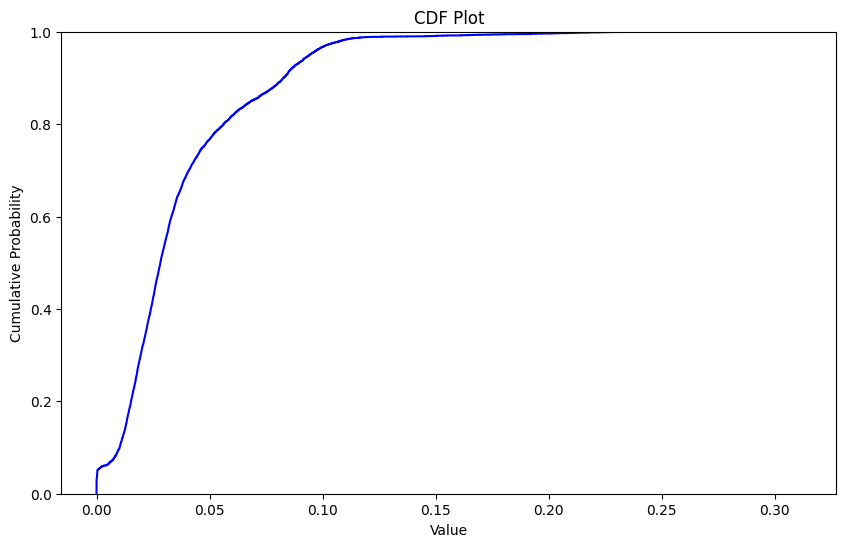

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of real numbers
# data = np.random.normal(loc=0, scale=1, size=1000)
data = diffs

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data, fill=True, color='b')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

# CDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data, color='b')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('CDF Plot')
plt.show()

In [ ]:
np.count_nonzero((np.array(data) > 0.17))

48

In [ ]:
len(data)

7344

In [ ]:
np.count_nonzero((np.array(data) > 0.17)) / len(data)

0.006535947712418301

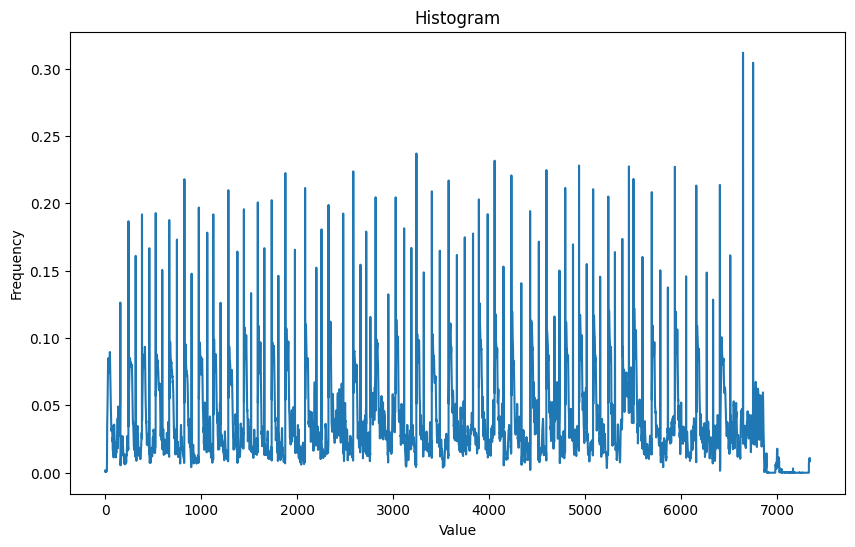

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [ ]:
# Calculate the relative differences between consecutive elements
relative_diffs = np.diff(diffs) / diffs[:-1]

# Set a threshold for the relative change
threshold = 2  # You can adjust this value based on your observations

# Find the indices of the spikes
spike_indices = np.where(relative_diffs > threshold)[0] + 1

In [ ]:
print(len(spike_indices))
print("Indices of spikes:", spike_indices)

80
Indices of spikes: [ 242  317  383  459  526  594  667  747  825  900  975 1063 1126 1283
 1377 1445 1520 1590 1658 1735 1804 1877 1977 2083 2200 2254 2327 2480
 2585 2660 2720 2763 2818 2950 3027 3115 3190 3243 3320 3404 3487 3579
 3665 3747 3833 3894 3986 4058 4150 4233 4336 4428 4431 4519 4598 4682
 4794 4875 4938 5018 5085 5158 5243 5312 5389 5458 5505 5599 5696 5785
 5864 5937 6054 6160 6269 6335 6406 6514 6647 6752]


In [ ]:
diffs[-10:]

[0.008020638,
 0.0079716565,
 0.008729427,
 0.008799958,
 0.009033624,
 0.00887328,
 0.010546617,
 0.008065315,
 0.010352557,
 0.010535347]

In [ ]:
nonzero_diffs = diffs[np.where(diffs != 0)]

In [ ]:
diffs = np.array(diffs)

In [ ]:
# Compute the differences between consecutive diffs values
diffs_diff = np.diff(diffs)

# Set a minimum absolute difference threshold
#min_abs_diff = np.percentile(nonzero_diffs, 1)

# Set a minimum absolute difference threshold as 1% of the range between diffs.min() and diffs.max()
min_abs_diff = diffs.min() + 0.01 * (diffs.max() - diffs.min())

# Calculate the relative differences
relative_diffs = np.abs(diffs_diff) / (np.abs(diffs[:-1]) + min_abs_diff)

# Find the spike indices using a threshold for the relative differences
threshold = 2  # You can adjust this threshold depending on your requirements
spike_indices = np.where(relative_diffs > threshold)[0] + 1

In [ ]:
min_abs_diff

0.003117320239543915

In [ ]:
print(len(spike_indices))
print("Indices of spikes:", spike_indices)

83
Indices of spikes: [ 242  317  383  459  526  594  667  747  825  900  975 1063 1126 1202
 1283 1377 1445 1520 1590 1658 1735 1804 1877 1977 2083 2200 2254 2327
 2480 2585 2660 2720 2763 2818 2950 3027 3115 3190 3243 3320 3404 3487
 3579 3665 3747 3833 3894 3986 4058 4150 4233 4336 4428 4431 4519 4598
 4682 4794 4875 4938 5018 5085 5158 5243 5312 5389 5458 5505 5599 5696
 5785 5864 5937 6054 6160 6269 6335 6406 6411 6514 6647 6752 7334]


In [ ]:
def show(*frame_indices):
    file = "input.vid"
    cap = cv2.VideoCapture(file)
    i = 0
    d = 0
    while True:
        fi = frame_indices[i] + d
        print(i, fi, relative_diffs[fi], diffs[fi], diffs[fi-1])
        cap.set(cv2.CAP_PROP_POS_FRAMES, fi)
        ret, frame = cap.read()
        if ret:
            cv2.imshow(window_title, frame)
            key = cv2_wait_key()
            if key == 'q':
                break
            if key == ' ':
                i += 1
            elif key == '\b':
                i -= 1
            elif key == 'p':
                d = -1 - d
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
def cv2_wait_key():
    while True:
        key = cv2.waitKey(10)
        if key >= 0:
            return chr(key)

In [ ]:
show(*reversed(list(spike_indices)))

0 7334 0.004397669 0.008020638 0.0
1 6752 0.8120468 0.30424502 0.021639755
2 6647 0.92037326 0.31173202 0.025853628
3 6514 0.77453333 0.16135019 0.019481685
4 6411 0.209797 0.031661622 0.0056268596
5 6406 0.9789813 0.21360128 0.019884968
6 6335 0.8642191 0.12847058 0.0074109277
7 6269 0.7971481 0.14857669 0.017194215
8 6160 0.7779626 0.21311672 0.007763167
9 6054 0.9046822 0.14579563 0.027561726
10 5937 0.7504534 0.2270225 0.036967263
11 5864 0.73864645 0.13754487 0.029456133
12 5785 0.8931568 0.1502249 0.024992753
13 5696 0.72952926 0.2082751 0.013539982
14 5599 0.8436758 0.16017649 0.017869035
15 5505 0.75655246 0.21803556 0.03677119
16 5458 0.7412298 0.22735302 0.0444388
17 5389 0.49133086 0.17355472 0.039115567
18 5312 0.84360594 0.16375677 0.024276378
19 5243 0.73612267 0.20498215 0.016698848
20 5158 0.7294868 0.14554094 0.032873083
21 5085 0.7463692 0.21044238 0.017236497
22 5018 0.74626803 0.15489574 0.037571598
23 4938 0.76170456 0.2279788 0.016223187
24 4875 0.80334336 0.16947

In [ ]:
len(spike_indices)

83

In [ ]:
import cv2
import numpy as np

file = "input.vid"
cap = cv2.VideoCapture(file)

# Assuming you have calculated the spike_indices already

output_dir = "output_frames"

# remove all files under output_dir
from pathlib import Path
for f in Path(output_dir).glob("*"): f.remove()

# Create the output directory if it doesn't exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the frames at the spike indices to image files
for index, frame_index in enumerate(spike_indices):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = cap.read()
    if ret:
        frame_filename = os.path.join(output_dir, f"frame_{index:04d}.png")
        cv2.imwrite(frame_filename, frame)
        cv2.imshow(window_title, frame)
        print(f"Saved frame {frame_index} to {frame_filename}")
    else:
        print(f"Error reading frame {frame_index}")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Saved frame 242 to output_frames/frame_0000.png
Saved frame 317 to output_frames/frame_0001.png
Saved frame 383 to output_frames/frame_0002.png
Saved frame 459 to output_frames/frame_0003.png
Saved frame 526 to output_frames/frame_0004.png
Saved frame 594 to output_frames/frame_0005.png
Saved frame 667 to output_frames/frame_0006.png
Saved frame 747 to output_frames/frame_0007.png
Saved frame 825 to output_frames/frame_0008.png
Saved frame 900 to output_frames/frame_0009.png
Saved frame 975 to output_frames/frame_0010.png
Saved frame 1063 to output_frames/frame_0011.png
Saved frame 1126 to output_frames/frame_0012.png
Saved frame 1202 to output_frames/frame_0013.png
Saved frame 1283 to output_frames/frame_0014.png
Saved frame 1377 to output_frames/frame_0015.png
Saved frame 1445 to output_frames/frame_0016.png
Saved frame 1520 to output_frames/frame_0017.png
Saved frame 1590 to output_frames/frame_0018.png
Saved frame 1658 to output_frames/frame_0019.png
Saved frame 1735 to output_fram

In [ ]:
cap.release()
cv2.destroyAllWindows()

# Run segment anything on each frame

## Set-up

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

## Example image

In [ ]:
image = cv2.imread('../pix/barbarella.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

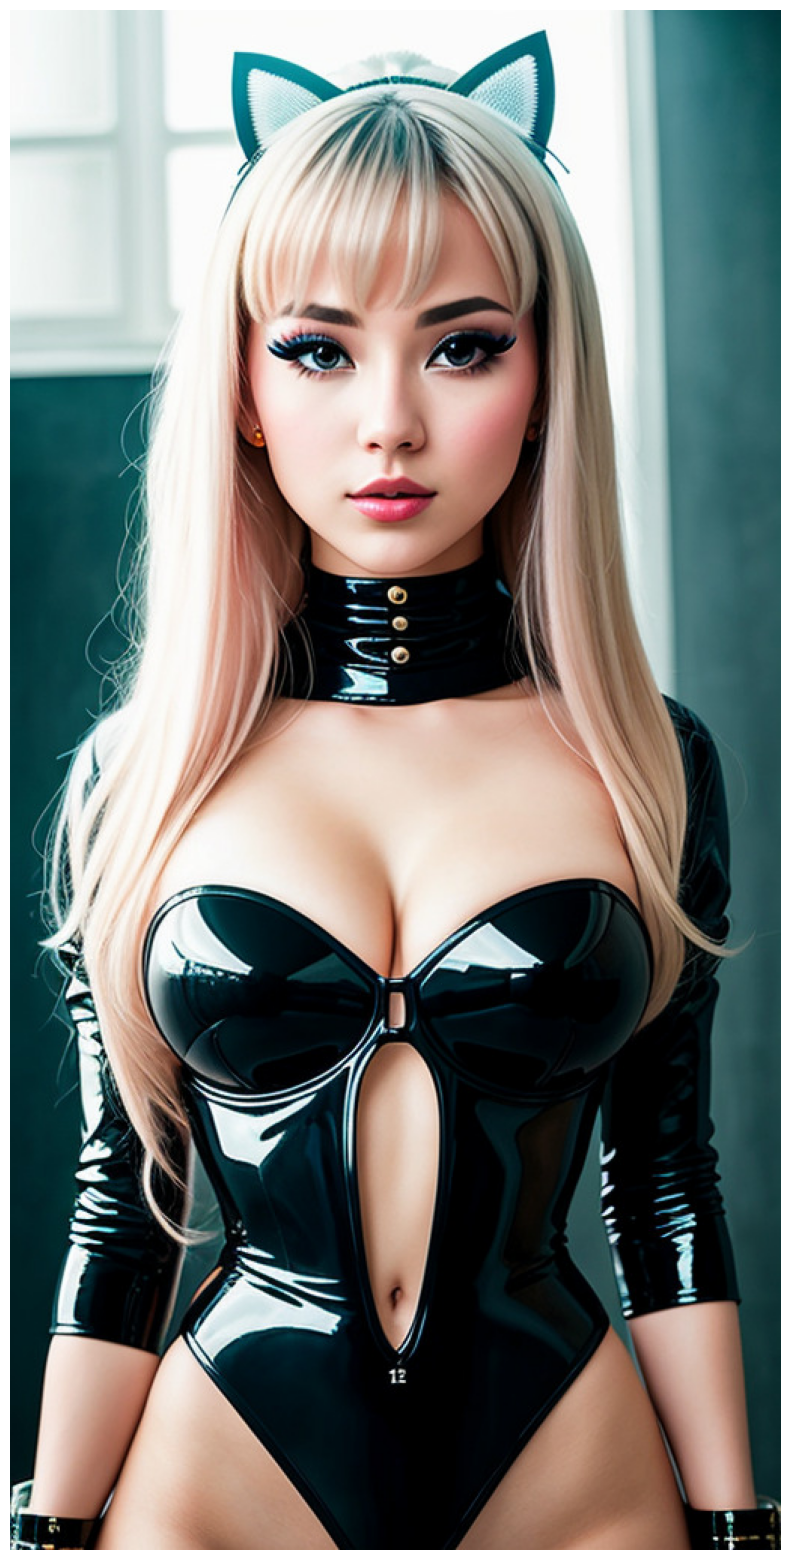

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

## Automatic mask generation

To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.

In [ ]:
sam_model_dir = Path("/opt/models/sam")
sam_checkpoint = "sam_vit_h_4b8939.pth"
sam_checkpoint_path = sam_model_dir/sam_checkpoint

device = "cuda"
model_type = "default"

In [ ]:
#import sys
#sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint_path)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

To generate masks, just run `generate` on an image.

In [ ]:
masks = mask_generator.generate(image)

Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:
* `segmentation` : the mask
* `area` : the area of the mask in pixels
* `bbox` : the boundary box of the mask in XYWH format
* `predicted_iou` : the model's own prediction for the quality of the mask
* `point_coords` : the sampled input point that generated this mask
* `stability_score` : an additional measure of mask quality
* `crop_box` : the crop of the image used to generate this mask in XYWH format

In [ ]:
print(len(masks))
print(masks[0].keys())

46
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


Show all the masks overlayed on the image.

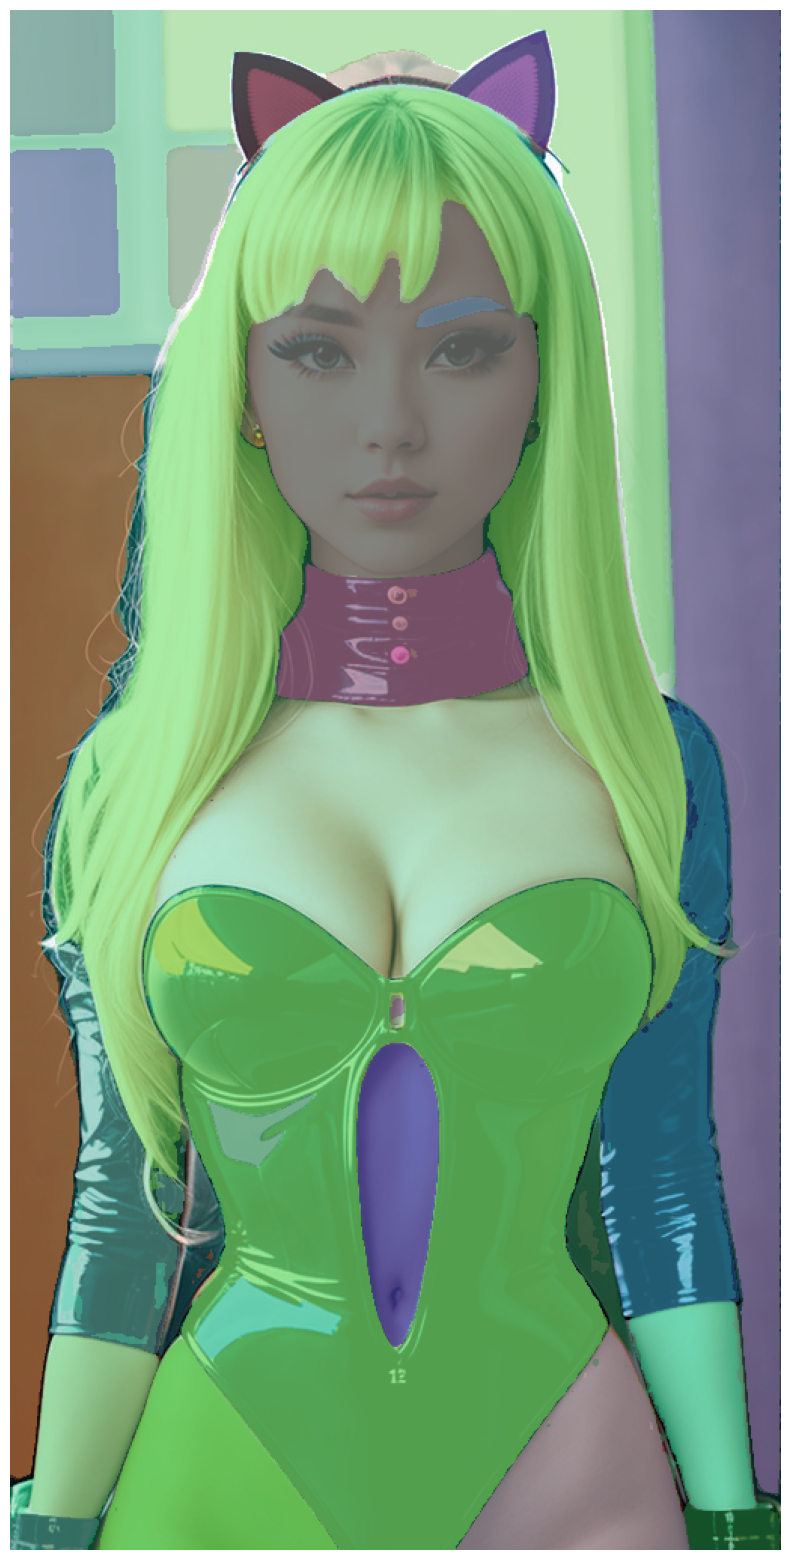

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
#show_anns(masks[:1])
show_anns(masks)
plt.axis('off')
plt.show() 

## Automatic mask generation options

There are several tunable parameters in automatic mask generation that control how densely points are sampled and what the thresholds are for removing low quality or duplicate masks. Additionally, generation can be automatically run on crops of the image to get improved performance on smaller objects, and post-processing can remove stray pixels and holes. Here is an example configuration that samples more masks:

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [ ]:
masks2 = mask_generator_2.generate(image)

In [ ]:
len(masks2)

51

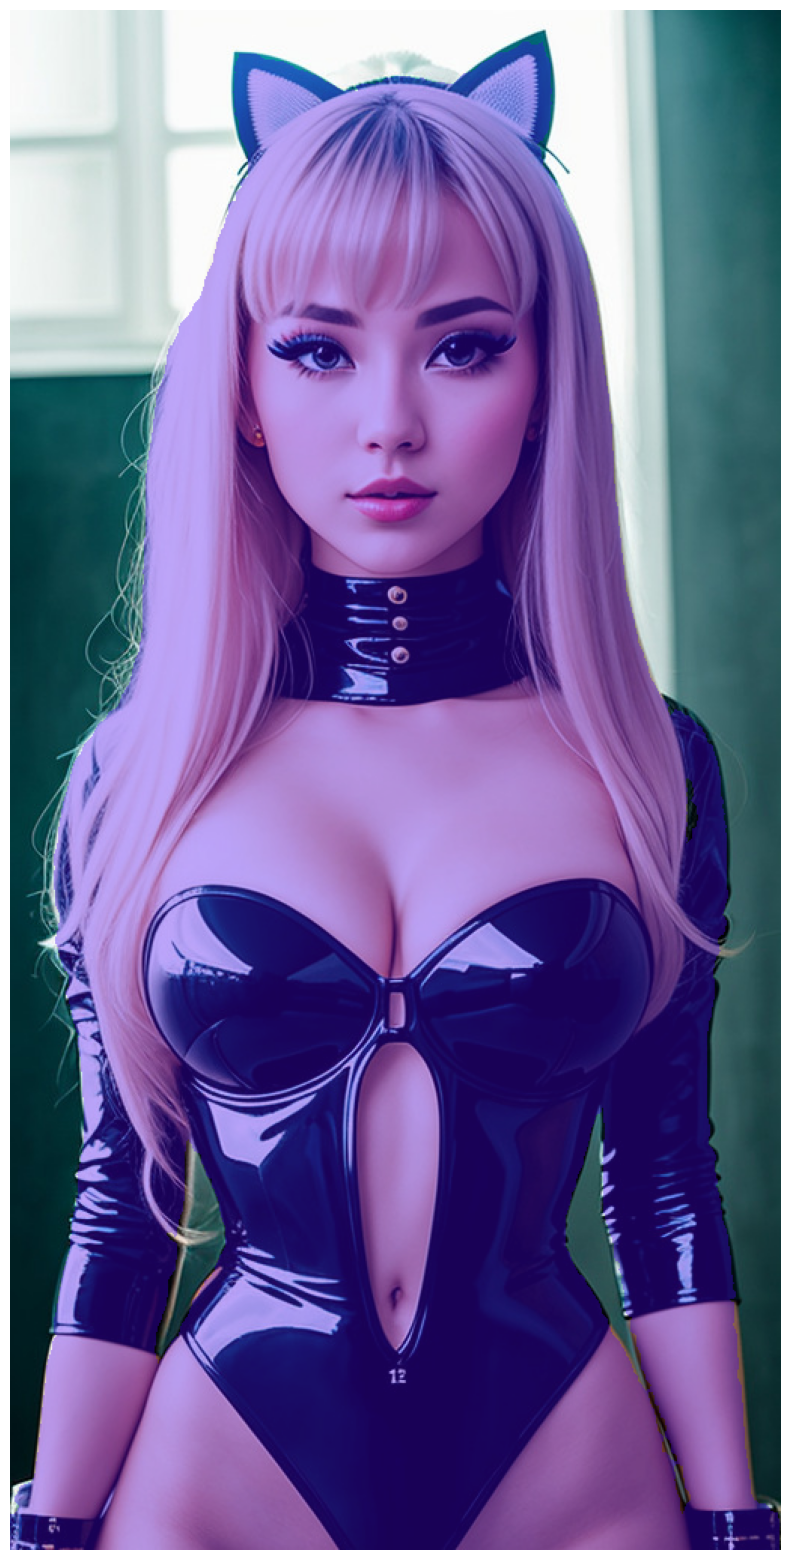

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns([masks2[0]])
plt.axis('off')
plt.show() 

In [ ]:
masks2[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 4279,
 'bbox': [72, 2, 54, 94],
 'predicted_iou': 0.99405437707901,
 'point_coords': [[76.71875, 55.9375]],
 'stability_score': 0.9856382012367249,
 'crop_box': [0, 0, 491, 358]}

In [ ]:
masks2.sort(key=lambda x: x['area'], reverse=True)

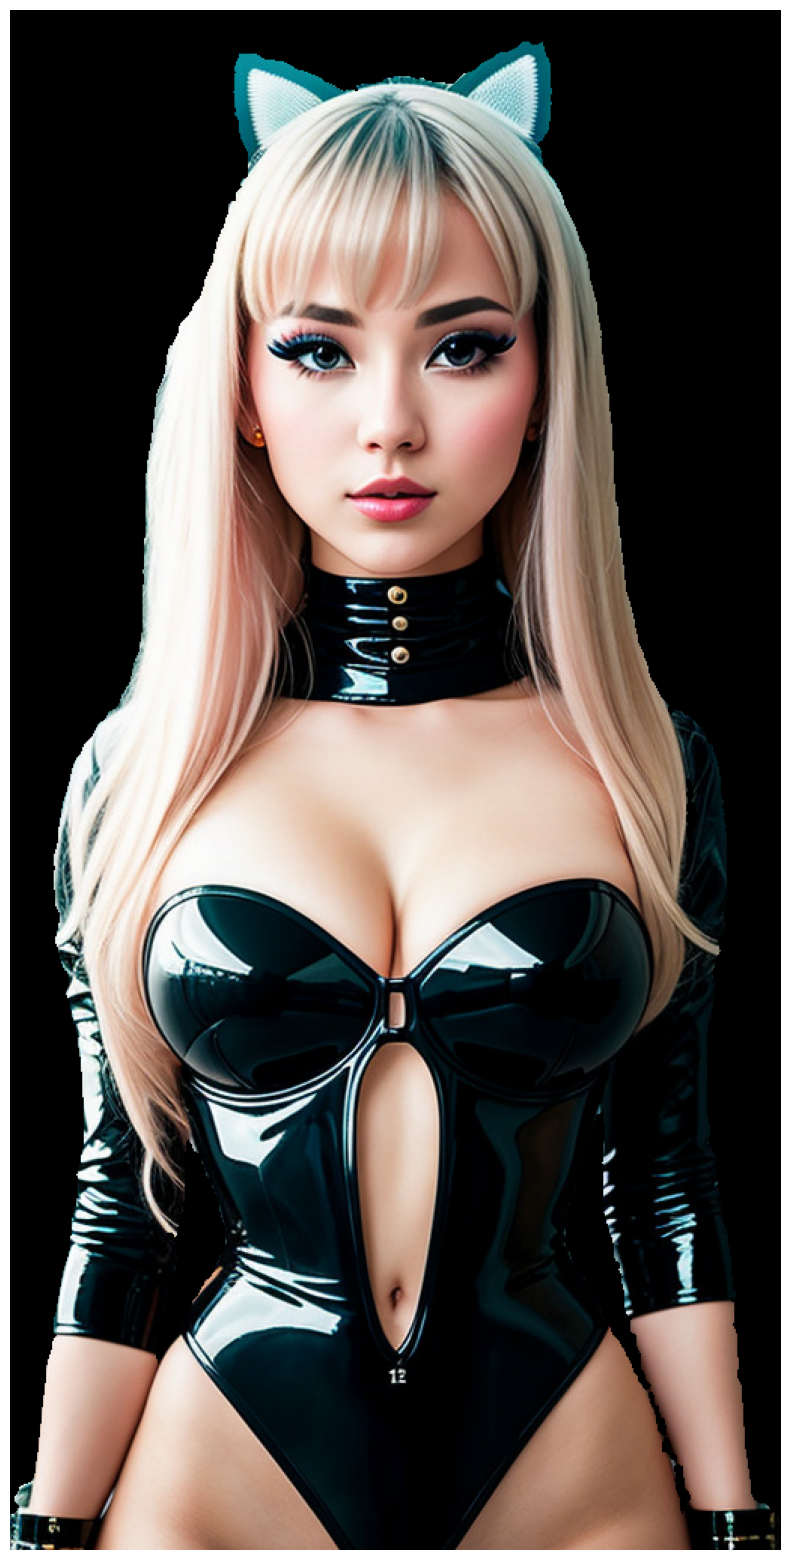

In [ ]:
def show_ann(ann):
    if type(ann) == dict:
        m = ann['segmentation']
    else:
        m = ann

    # m is a boolean mask for the image

    # apply the mask to the image

    masked_image = np.copy(image)
    masked_image[~m] = [0, 0, 0]

    plt.figure(figsize=(20,20))
    plt.imshow(masked_image)
    plt.axis('off')
    plt.show()

show_ann(masks2[0])

## filter masks, removing sub-objects for now

In [ ]:
masks3 = []
h, w, chans = image.shape
zeros = np.zeros((image.shape[0], image.shape[1]), dtype=bool)
union = zeros.copy()
threshold = 0.95
print("total", h * w)
for i, ann in enumerate(masks2):
    mask = ann['segmentation']
    intersection = union & mask
    count_mask = np.sum(mask)
    count_intersection = np.sum(intersection)
    count_union = np.sum(union)
    # print(count_mask, count_intersection, count_union)
    if count_intersection / count_mask > threshold:
        # TODO could combine them
        print("skipping", i)
    else:
        union = union | mask
        masks3.append(ann)

print(len(masks3), len(masks2))

total 524288
skipping 1
skipping 2
skipping 5
skipping 7
skipping 9
skipping 10
skipping 11
skipping 12
skipping 13
skipping 14
skipping 15
skipping 17
skipping 18
skipping 20
skipping 22
skipping 23
skipping 25
skipping 26
skipping 27
skipping 29
skipping 31
skipping 33
skipping 35
skipping 36
skipping 37
skipping 39
skipping 40
skipping 41
skipping 42
skipping 43
skipping 44
skipping 45
skipping 46
skipping 48
skipping 49
skipping 50
15 51


In [ ]:
len(masks3)

15

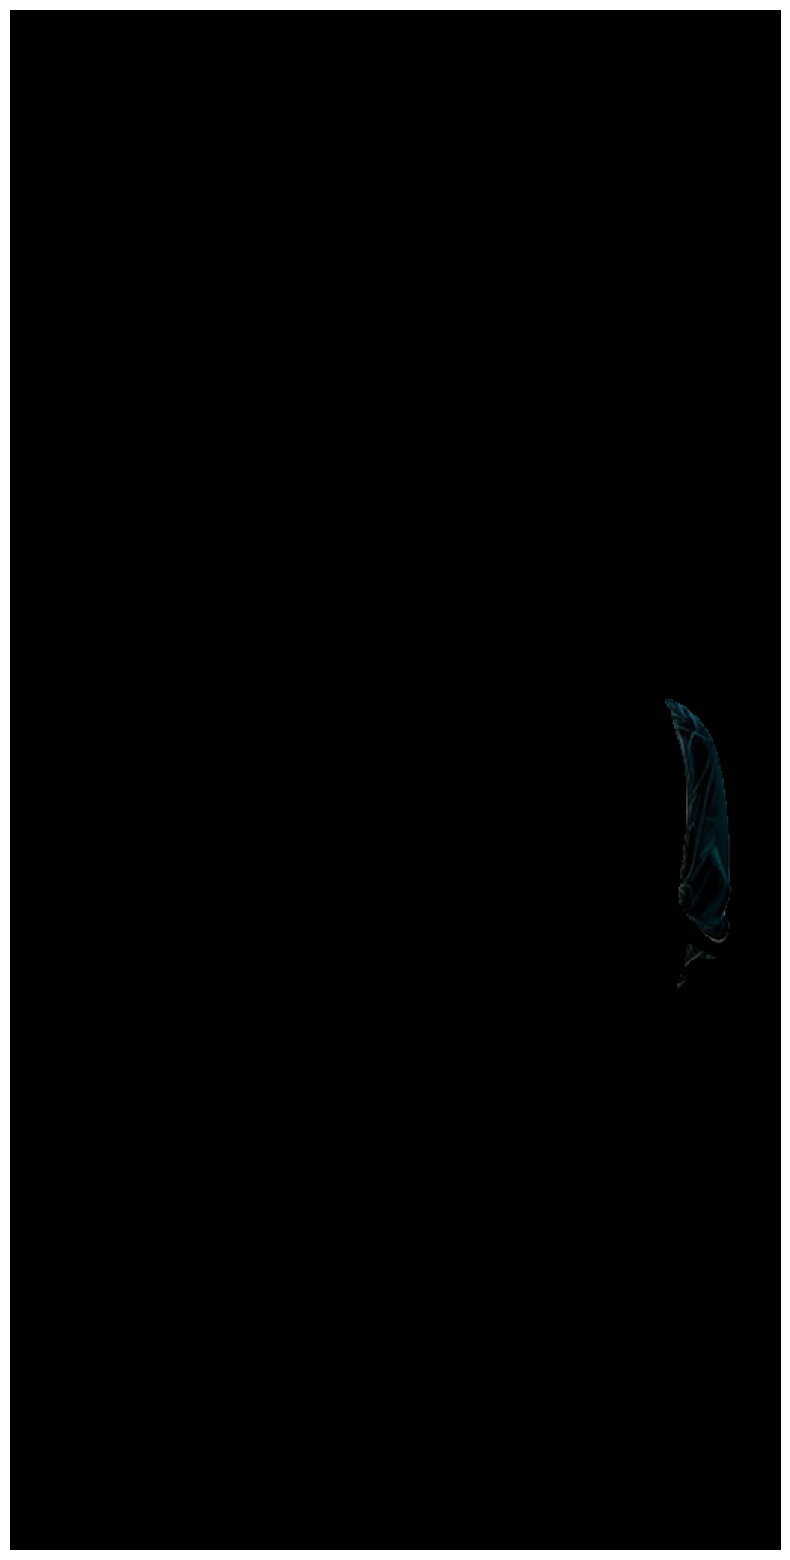

In [ ]:
show_ann(masks2[23])

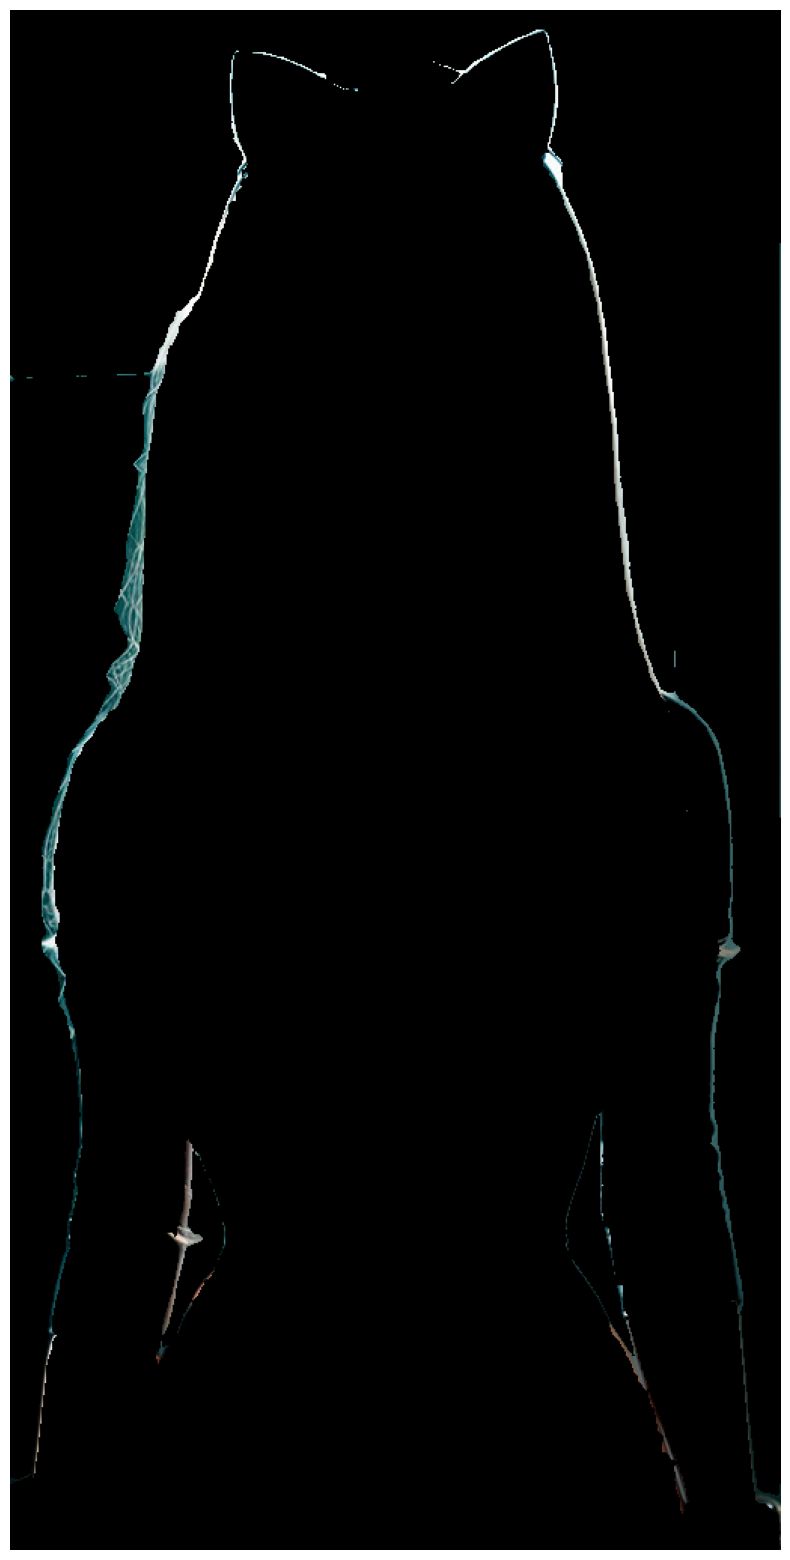

In [ ]:
show_ann(~union)

## scratch

In [ ]:
image.shape

(534, 800, 3)

In [ ]:
union.nbytes

427200

In [ ]:
import functools
union_all = functools.reduce(lambda a, b: a|b, [x['segmentation'] for x in masks2], zeros)

In [ ]:
np.sum(union_all) / (w*h)

0.9766385767790262

In [ ]:
np.sum(union) / (w*h)

0.9722752808988764

In [ ]:
masks2[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True, False]]),
 'area': 359928,
 'bbox': [0, 21, 510, 1002],
 'predicted_iou': 1.0074331760406494,
 'point_coords': [[120.0, 560.0]],
 'stability_score': 0.9779029488563538,
 'crop_box': [0, 0, 512, 1024]}

In [ ]:
list(map(lambda x: x['stability_score'], masks2))

[0.9779029488563538,
 0.9577646255493164,
 0.9423844814300537,
 0.9551906585693359,
 0.9578201770782471,
 0.9741223454475403,
 0.9559900760650635,
 0.967279314994812,
 0.9325753450393677,
 0.9683087468147278,
 0.9771275520324707,
 0.9396081566810608,
 0.9865119457244873,
 0.9869593381881714,
 0.9875197410583496,
 0.9625687599182129,
 0.9336937665939331,
 0.9705004096031189,
 0.9706836342811584,
 0.9869527220726013,
 0.9874058961868286,
 0.956467866897583,
 0.9747161865234375,
 0.9397671222686768,
 0.979409396648407,
 0.9272911548614502,
 0.9776614308357239,
 0.9608917832374573,
 0.9776371121406555,
 0.9693617224693298,
 0.9353002309799194,
 0.9700761437416077,
 0.9681386351585388,
 0.9825511574745178,
 0.9759188890457153,
 0.984311044216156,
 0.9804630875587463,
 0.9731494784355164,
 0.974595844745636,
 0.9840510487556458,
 0.9669620990753174,
 0.9391891956329346,
 0.9636542201042175,
 0.9376590251922607,
 0.9807407259941101,
 0.9858155846595764,
 0.9751381278038025,
 0.930930912494659

In [ ]:
mask = masks2[14]['segmentation']
# mask = masks2[0]['segmentation']
masked_image = np.where(mask[:, :, np.newaxis], image, 0)

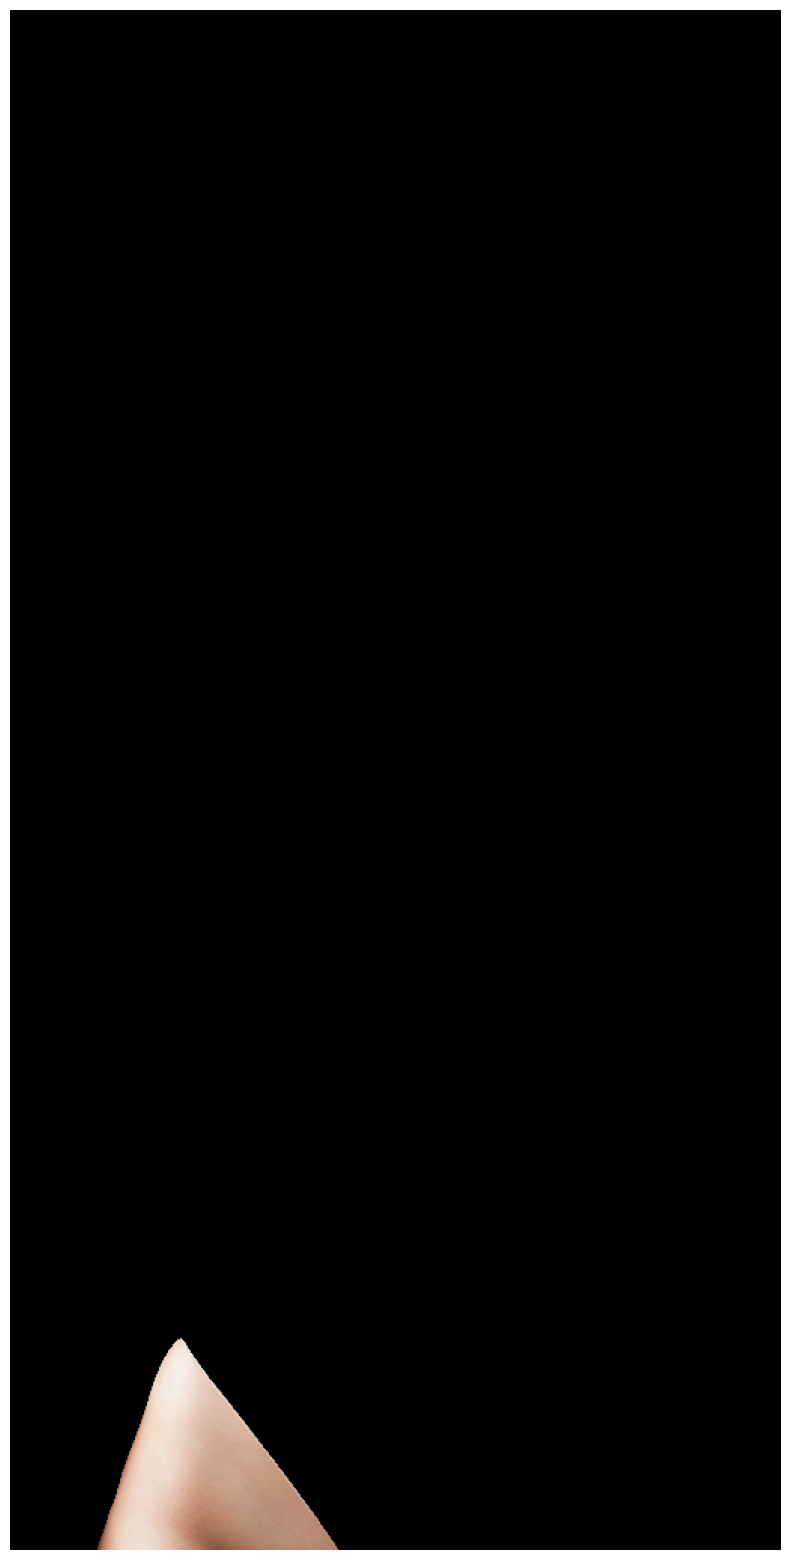

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(masked_image)
plt.axis('off')
plt.show()

In [ ]:
average_rgb = np.mean(masked_image[mask], axis=0)

In [ ]:
median_rgb = np.median(masked_image[mask], axis=0)

In [ ]:
average_rgb, median_rgb

(array([212.48400335, 178.14128978, 158.78467337]), array([215., 176., 154.]))

In [ ]:
color = np.full(image.shape, median_rgb, dtype=np.uint8)

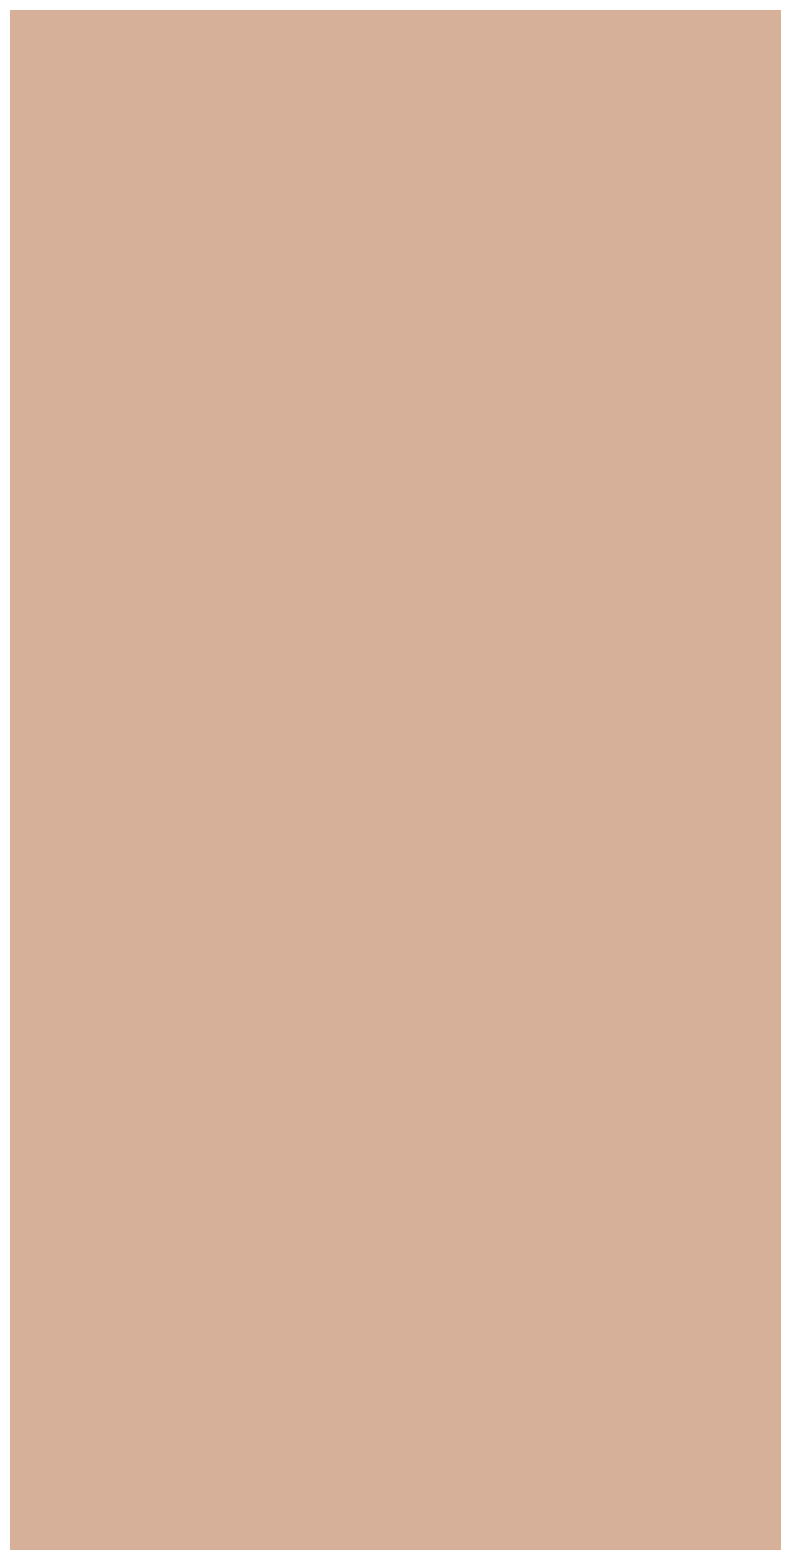

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(color)
plt.axis('off')
plt.show()

In [ ]:
def stats(ary):
    return ary.min(), ary.max(), ary.mean()

In [ ]:
stats(image)

(0, 255, 118.89866383870442)

In [ ]:
stats(modified_image)

(0, 255, 135.21274185180664)

In [ ]:
img = image.copy()

In [ ]:
cmask = masks2[1]['segmentation']

In [ ]:
img = np.where(cmask[:, :, np.newaxis], median_rgb, img).astype(np.uint8)

In [ ]:
cmask = masks2[8]['segmentation']

In [ ]:
img = np.where(cmask[:, :, np.newaxis], median_rgb, img).astype(np.uint8)

In [ ]:
cmask = masks2[12]['segmentation']

In [ ]:
img = np.where(cmask[:, :, np.newaxis], median_rgb, img).astype(np.uint8)

In [ ]:
def show_image(ary):
    plt.figure(figsize=(20,20))
    plt.imshow(ary)
    plt.axis('off')
    plt.show()

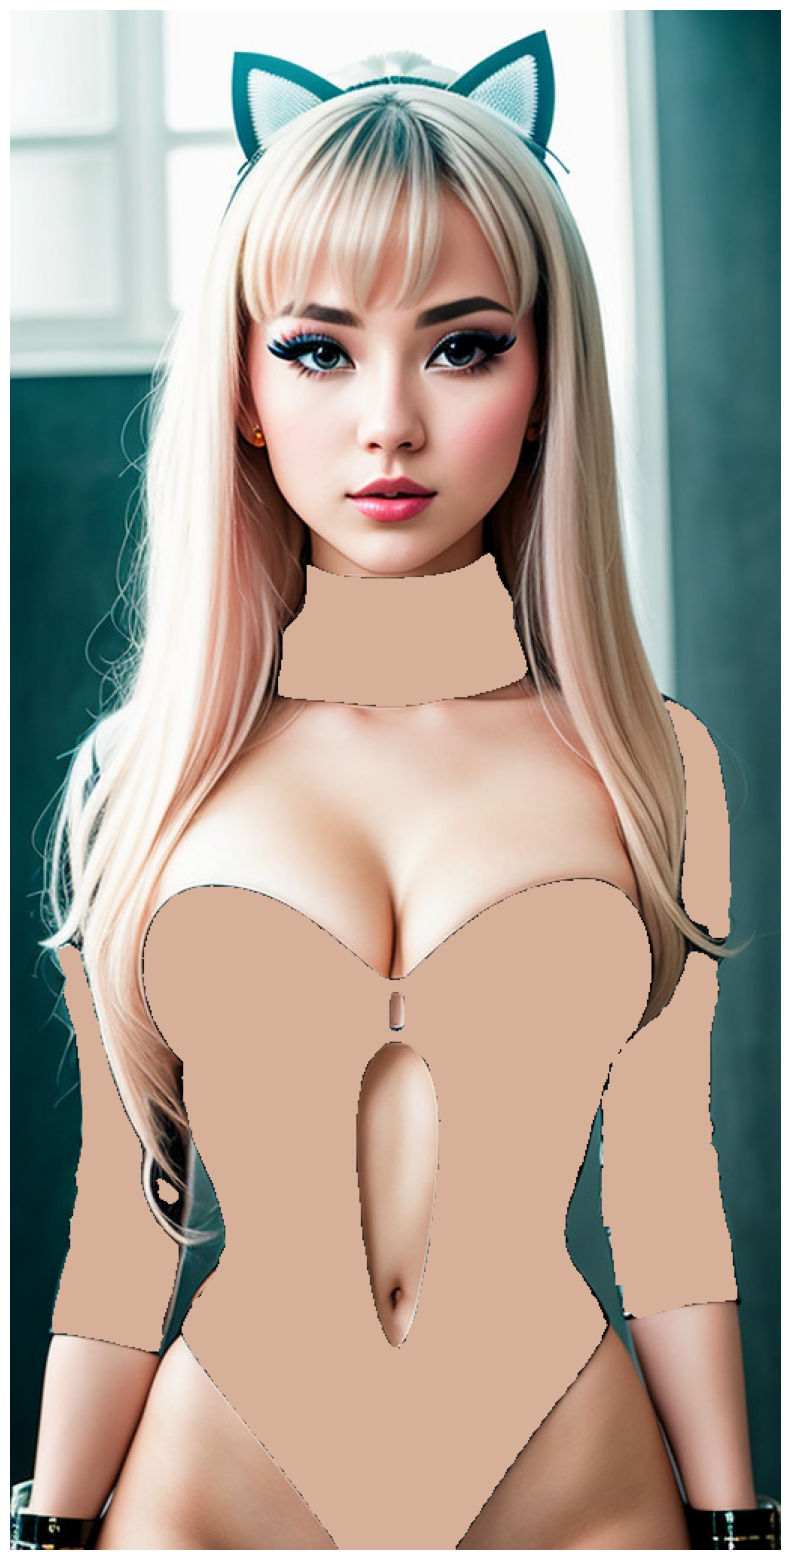

In [ ]:
show_image(img)

In [ ]:
img_out = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [ ]:
cv2.imwrite('modified_image.jpg', img_out)

True